<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.652673,33.086988,76.022612,12.840183,195.602455,186.676499,8.925957
1,0.0,1.0,60.158474,77.071397,61.200457,-4.254163,204.176165,210.099319,-5.923154
2,0.0,2.0,52.485428,98.828353,56.076295,-4.270909,213.119167,217.791259,-4.672092
3,0.0,3.0,54.202916,66.855926,26.607886,18.725087,176.391815,161.683262,14.708553
4,0.0,4.0,35.837302,81.136926,21.849856,11.733333,160.557418,151.969700,8.587718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.688047,86.063844,21.277753,13.233418,193.263061,173.018458,20.244604
29996,999.0,26.0,90.473350,40.645771,39.681268,-0.510925,180.289465,183.591939,-3.302474
29997,999.0,27.0,56.664247,50.597088,44.004773,5.125600,166.391708,159.382368,7.009340
29998,999.0,28.0,71.471966,29.639717,96.566469,1.809542,209.487694,210.255711,-0.768018


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    63.652673  33.086988  76.022612  ...  195.602455  186.676499   8.925957
      1.0    60.158474  77.071397  61.200457  ...  204.176165  210.099319  -5.923154
      2.0    52.485428  98.828353  56.076295  ...  213.119167  217.791259  -4.672092
      3.0    54.202916  66.855926  26.607886  ...  176.391815  161.683262  14.708553
      4.0    35.837302  81.136926  21.849856  ...  160.557418  151.969700   8.587718
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   62.688047  86.063844  21.277753  ...  193.263061  173.018458  20.244604
      26.0   90.473350  40.645771  39.681268  ...  180.289465  183.591939  -3.302474
      27.0   56.664247  50.597088  44.004773  ...  166.391708  159.382368   7.009340
      28.0   71.471966  29.639717  96.566469  ...  209.487694  210.255711  -0.768018
      29.0   44.376303  89.658256  95.393337  ...  228.904375  229.786934  -0.882559

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    63.652673  33.086988  76.022612  ...  195.602455  186.676499   8.925957
      1.0    60.158474  77.071397  61.200457  ...  204.176165  210.099319  -5.923154
      2.0    52.485428  98.828353  56.076295  ...  213.119167  217.791259  -4.672092
      3.0    54.202916  66.855926  26.607886  ...  176.391815  161.683262  14.708553
      4.0    35.837302  81.136926  21.849856  ...  160.557418  151.969700   8.587718
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   62.688047  86.063844  21.277753  ...  193.263061  173.018458  20.244604
      26.0   90.473350  40.645771  39.681268  ...  180.289465  183.591939  -3.302474
      27.0   56.664247  50.597088  44.004773  ...  166.391708  159.382368   7.009340
      28.0   71.471966  29.639717  96.566469  ...  209.487694  210.255711  -0.768018
      29.0   44.376303  89.658256  95.393337  ...  228.904375  229.786934  -0.882559

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.652673,33.086988,76.022612,12.840183,195.602455,186.676499,8.925957
1,0.0,1.0,60.158474,77.071397,61.200457,-4.254163,204.176165,210.099319,-5.923154
2,0.0,2.0,52.485428,98.828353,56.076295,-4.270909,213.119167,217.791259,-4.672092
3,0.0,3.0,54.202916,66.855926,26.607886,18.725087,176.391815,161.683262,14.708553
4,0.0,4.0,35.837302,81.136926,21.849856,11.733333,160.557418,151.969700,8.587718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.688047,86.063844,21.277753,13.233418,193.263061,173.018458,20.244604
29996,999.0,26.0,90.473350,40.645771,39.681268,-0.510925,180.289465,183.591939,-3.302474
29997,999.0,27.0,56.664247,50.597088,44.004773,5.125600,166.391708,159.382368,7.009340
29998,999.0,28.0,71.471966,29.639717,96.566469,1.809542,209.487694,210.255711,-0.768018


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    63.652673  33.086988  76.022612  ...  195.602455  186.676499   8.925957
      1.0    60.158474  77.071397  61.200457  ...  204.176165  210.099319  -5.923154
      2.0    52.485428  98.828353  56.076295  ...  213.119167  217.791259  -4.672092
      3.0    54.202916  66.855926  26.607886  ...  176.391815  161.683262  14.708553
      4.0    35.837302  81.136926  21.849856  ...  160.557418  151.969700   8.587718
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   62.688047  86.063844  21.277753  ...  193.263061  173.018458  20.244604
      26.0   90.473350  40.645771  39.681268  ...  180.289465  183.591939  -3.302474
      27.0   56.664247  50.597088  44.004773  ...  166.391708  159.382368   7.009340
      28.0   71.471966  29.639717  96.566469  ...  209.487694  210.255711  -0.768018
      29.0   44.376303  89.658256  95.393337  ...  228.904375  229.786934  -0.882559

[30000 rows x 7 columns]

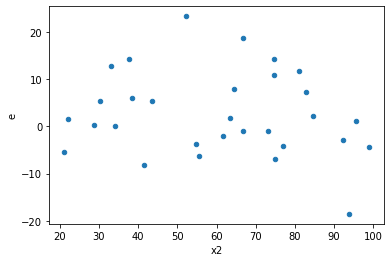

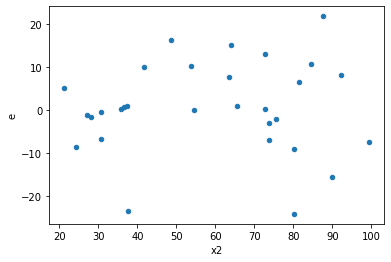

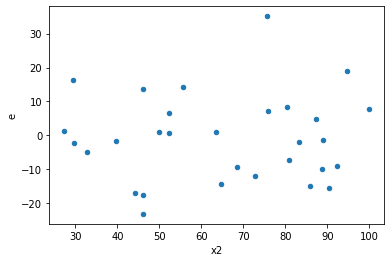

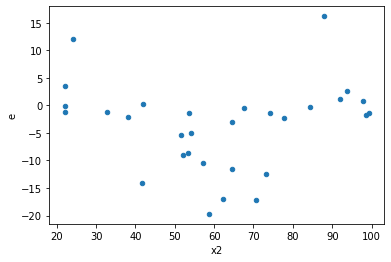

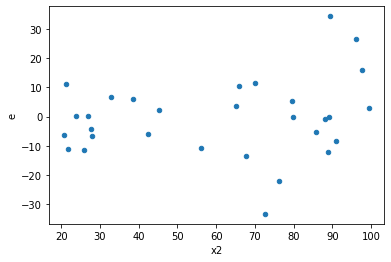

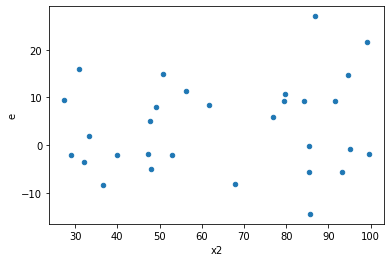

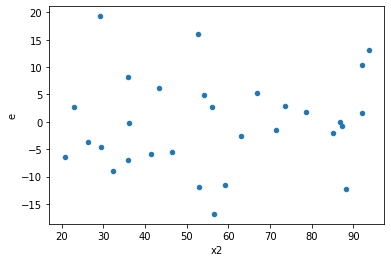

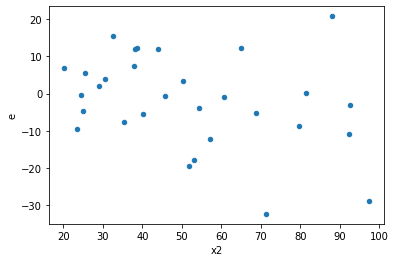

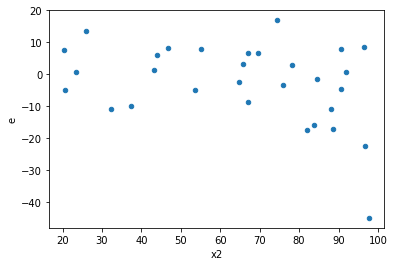

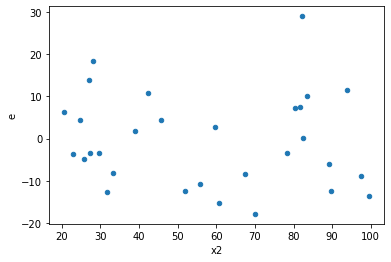

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,13.0,815.0781046393732,1175.9669292866038,74.09800951267029,90.45899456050799,1.2208019507600953,0.7232104242772022,0.6383947878613989,0.3616052121386011,Reject001=1 : Homoscedasticity
2.0,9.0,15.0,885.6079010043732,2706.4047525180767,98.4008778893748,180.42698350120511,1.8335911972660093,0.2875552639181991,0.8562223680409005,0.14377763195909954,Reject001=1 : Homoscedasticity
4.0,3.0,21.0,404.7795299379093,3849.8652186121776,134.9265099793031,183.32691517200846,1.3587167947954015,0.5652277276651922,0.7173861361674039,0.2826138638325961,Reject001=1 : Homoscedasticity
5.0,11.0,13.0,152.43201432810076,1515.807999652694,13.85745584800916,116.60061535789954,8.414287343708263,0.0006018215317611375,0.9996990892341194,0.00030091076588056875,Reject001=0 : Heteroscedasticity
8.0,8.0,16.0,666.9453310987536,2104.0010443763836,83.3681663873442,131.50006527352397,1.5773414598391178,0.41639346576133796,0.791803267119331,0.20819673288066898,Reject001=1 : Homoscedasticity
12.0,7.0,17.0,169.37749784159786,1864.7469149133892,24.196785405942553,109.69099499490525,4.533287920467566,0.01027998444297995,0.99486000777851,0.005139992221489975,Reject001=1 : Homoscedasticity
13.0,13.0,11.0,1452.4908003489331,2151.312133449341,111.73006156530255,195.57383031357648,1.750413698638034,0.3590761814833947,0.8204619092583026,0.17953809074169735,Reject001=1 : Homoscedasticity
14.0,11.0,13.0,815.6539186214555,1198.6654672628626,74.15035623831415,92.20503594329713,1.2434874304171444,0.6999479864155189,0.6500260067922405,0.34997399320775946,Reject001=1 : Homoscedasticity
15.0,13.0,11.0,1358.3971842717986,2500.625376641875,104.49209109783065,227.3295796947159,2.1755673305635996,0.20450895532735514,0.8977455223363224,0.10225447766367757,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,7.0,1289.156776651829,249.7931110329267,75.83275156775464,35.684730147560956,0.4705714801298955,0.19364060981196832,Reject001=1 : Homoscedasticity
1.0,11.0,13.0,815.0781046393732,1175.9669292866038,74.09800951267029,90.45899456050799,1.2208019507600953,0.7232104242772022,Reject001=1 : Homoscedasticity
2.0,9.0,15.0,885.6079010043732,2706.4047525180767,98.4008778893748,180.42698350120511,1.8335911972660093,0.2875552639181991,Reject001=1 : Homoscedasticity
3.0,11.0,13.0,715.1978136094806,483.2589109830668,65.01798305540733,37.173762383312834,0.5717458560908284,0.3597544550573041,Reject001=1 : Homoscedasticity
4.0,3.0,21.0,404.7795299379093,3849.8652186121776,134.9265099793031,183.32691517200846,1.3587167947954015,0.5652277276651922,Reject001=1 : Homoscedasticity
5.0,11.0,13.0,152.43201432810076,1515.807999652694,13.85745584800916,116.60061535789954,8.414287343708263,0.0006018215317611375,Reject001=0 : Heteroscedasticity
6.0,11.0,13.0,865.2093458716747,769.4752497076945,78.65539507924315,59.19040382366881,0.7525282120067683,0.6443065967160512,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,2595.6826297690136,833.3713617500207,259.56826297690134,59.526525839287196,0.22932898327629672,0.024334438908514437,Reject001=1 : Homoscedasticity
8.0,8.0,16.0,666.9453310987536,2104.0010443763836,83.3681663873442,131.50006527352397,1.5773414598391178,0.41639346576133796,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      933
Reject001=0 : Heteroscedasticity     67
Name: Result_test, dtype: int64